In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_autoconsumo = pd.read_csv("exp_autoconsumo.csv", sep = ';', encoding = 'utf-8')

In [4]:
df_autoconsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25845 entries, 0 to 25844
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_exp               25845 non-null  int64  
 1   cod_procedimiento    25845 non-null  int64  
 2   dni                  25332 non-null  float64
 3   nif                  513 non-null    float64
 4   fecha_alta_exp       25845 non-null  object 
 5   fecha_registro_exp   25845 non-null  object 
 6   municipio            25845 non-null  object 
 7   provincia            25845 non-null  object 
 8   unidad_tramitadora   3 non-null      object 
 9   denom_procedimiento  25845 non-null  object 
 10  desc_procedimiento   25845 non-null  object 
 11  siaci                25845 non-null  object 
 12  consejeria_proc      25845 non-null  object 
 13  org_instructor_proc  25845 non-null  object 
 14  cod_expediente       25845 non-null  float64
 15  es_telematica        25845 non-null 

Set data types for each column
(pip install pandas-stubs)

In [5]:
df_autoconsumo['id_exp'] = df_autoconsumo['id_exp'].astype('uint32')
df_autoconsumo['cod_procedimiento'] = df_autoconsumo['cod_procedimiento'].astype('uint32')
df_autoconsumo['dni'] = df_autoconsumo['dni'].astype(pd.Int32Dtype())
df_autoconsumo['nif'] = df_autoconsumo['nif'].astype(pd.Int32Dtype())
df_autoconsumo['fecha_alta_exp'] = df_autoconsumo['fecha_alta_exp'].astype('datetime64[s]')
df_autoconsumo['fecha_registro_exp'] = df_autoconsumo['fecha_registro_exp'].astype('datetime64[s]')
df_autoconsumo['municipio'] = df_autoconsumo['municipio'].astype('string')
df_autoconsumo['provincia'] = df_autoconsumo['provincia'].astype('string')
df_autoconsumo['unidad_tramitadora'] = df_autoconsumo['unidad_tramitadora'].astype('string')
df_autoconsumo['es_telematica'] = df_autoconsumo['es_telematica'].astype(pd.BooleanDtype())

In [6]:
df_autoconsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25845 entries, 0 to 25844
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   id_exp               25845 non-null  uint32       
 1   cod_procedimiento    25845 non-null  uint32       
 2   dni                  25332 non-null  Int32        
 3   nif                  513 non-null    Int32        
 4   fecha_alta_exp       25845 non-null  datetime64[s]
 5   fecha_registro_exp   25845 non-null  datetime64[s]
 6   municipio            25845 non-null  string       
 7   provincia            25845 non-null  string       
 8   unidad_tramitadora   3 non-null      string       
 9   denom_procedimiento  25845 non-null  object       
 10  desc_procedimiento   25845 non-null  object       
 11  siaci                25845 non-null  object       
 12  consejeria_proc      25845 non-null  object       
 13  org_instructor_proc  25845 non-null  object   

In [7]:
consejeria = df_autoconsumo.iloc[0].consejeria_proc
consejeria

'Consejeria de desarrollo sostenible'

In [8]:
organo = df_autoconsumo.iloc[0].org_instructor_proc
organo

'Direccion general de transicion energetica'

In [9]:
denom_procedimiento = df_autoconsumo.iloc[0].denom_procedimiento
denom_procedimiento

'SLPT - Ayudas para actuaciones de autoconsumo en el sector residencial, las administraciones públicas y el tercer sector'

In [10]:
df_autoconsumo['denom_procedimiento'].unique()

array(['SLPT - Ayudas para actuaciones de autoconsumo en el sector residencial, las administraciones públicas y el tercer sector'],
      dtype=object)

In [11]:
df_autoconsumo['desc_procedimiento'].unique()

array(['Convocatoria de los programas de incentivos 4 y 5 para actuaciones de autoconsumo, con fuentes de energias renovables, en el sector residencial, las administraciones publicas y el tercer sector.'],
      dtype=object)

In [12]:
desc_procedimiento = df_autoconsumo.iloc[0].desc_procedimiento
desc_procedimiento

'Convocatoria de los programas de incentivos 4 y 5 para actuaciones de autoconsumo, con fuentes de energias renovables, en el sector residencial, las administraciones publicas y el tercer sector.'

In [13]:
df_autoconsumo['unidad_tramitadora'].unique()

<StringArray>
[<NA>, 'Direccion general de transicion energetica']
Length: 2, dtype: string

In [14]:
siaci = df_autoconsumo.iloc[0].siaci
siaci

'SLPT'

In [15]:
columns_to_drop = ['org_instructor_proc',
                   'consejeria_proc',
                   'denom_procedimiento',
                   'desc_procedimiento',
                   'unidad_tramitadora',
                   'siaci',
                   'cod_expediente',
                   'cod_procedimiento']
df_autoconsumo_simple = df_autoconsumo.drop(columns = columns_to_drop)

In [16]:
df_autoconsumo_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25845 entries, 0 to 25844
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype        
---  ------              --------------  -----        
 0   id_exp              25845 non-null  uint32       
 1   dni                 25332 non-null  Int32        
 2   nif                 513 non-null    Int32        
 3   fecha_alta_exp      25845 non-null  datetime64[s]
 4   fecha_registro_exp  25845 non-null  datetime64[s]
 5   municipio           25845 non-null  string       
 6   provincia           25845 non-null  string       
 7   es_telematica       25845 non-null  boolean      
dtypes: Int32(2), boolean(1), datetime64[s](2), string(2), uint32(1)
memory usage: 1.2 MB


Set fech_registro_exp (date of presentation) as index.
Drop previous index

In [17]:
df_autoconsumo_simple.head()

,id_exp,dni,nif,fecha_alta_exp,fecha_registro_exp,municipio,provincia,es_telematica
0,1127895,1787973,<NA>,2022-02-09 09:07:17,2021-12-23,Poblete,Ciudad Real,True
1,1189980,1817983,<NA>,2022-03-25 08:12:34,2022-03-24,Méntrida,Toledo,True
2,1190024,1818001,<NA>,2022-03-25 08:19:59,2022-03-24,Villanueva de Alcardete,Toledo,True
3,1190043,1818006,<NA>,2022-03-25 08:22:58,2022-03-24,Ciudad Real,Ciudad Real,True
4,1190807,1818334,<NA>,2022-03-28 09:06:24,2022-03-25,Valdeaveruelo,Guadalajara,True


In [18]:
df_autoconsumo_simple.to_parquet('df_autoconsumo.parquet')

In [ ]:
day_D = df_autoconsumo_simple[df_autoconsumo_simple['fecha_registro_exp']=='2022-03-24']
len(day_D)

In [42]:
df_autoconsumo_simple.reset_index(drop=True, inplace=True)
df_autoconsumo_simple.set_index("fecha_registro_exp", inplace = True)

In [43]:
df_autoconsumo_simple.head(10)

,id_exp,dni,nif,fecha_alta_exp,municipio,provincia,es_telematica
fecha_registro_exp,,,,,,,
2021-12-23,1127895,1787973,<NA>,2022-02-09 09:07:17,Poblete,Ciudad Real,True
2022-03-24,1189980,1817983,<NA>,2022-03-25 08:12:34,Méntrida,Toledo,True
2022-03-24,1190024,1818001,<NA>,2022-03-25 08:19:59,Villanueva de Alcardete,Toledo,True
2022-03-24,1190043,1818006,<NA>,2022-03-25 08:22:58,Ciudad Real,Ciudad Real,True
2022-03-25,1190807,1818334,<NA>,2022-03-28 09:06:24,Valdeaveruelo,Guadalajara,True
2022-03-25,1190830,741348,<NA>,2022-03-28 09:08:06,Cubas de la Sagra,Madrid,True
2022-03-25,1190835,1818347,<NA>,2022-03-28 09:10:02,Valdepeñas,Ciudad Real,True
2022-03-25,1190838,1818348,<NA>,2022-03-28 09:10:23,Madridejos,Toledo,True
2022-03-26,1191750,1818693,<NA>,2022-03-29 08:41:27,Ontígola,Toledo,True


In [44]:
df_autoconsumo_simple.describe()

,id_exp,dni,nif,fecha_alta_exp
count,2.584500e+04,25332.0,513.0,25845
mean,1.395825e+06,1422453.740723,768903.335283,2022-12-11 20:16:16
min,1.083865e+06,1009.0,254.0,2022-02-04 12:38:09
25%,1.209188e+06,804161.75,50798.0,2022-04-28 13:22:02
50%,1.336033e+06,1808116.5,179503.0,2022-11-23 14:06:04
75%,1.577350e+06,1903742.25,1821609.0,2023-06-20 09:17:48
max,1.956447e+06,2192422.0,2118898.0,2024-06-21 08:45:55
std,1.970241e+05,657234.594835,872601.182076,NaN


In [45]:
df_autoconsumo_simple.fecha_alta_exp.describe()

count                  25845
mean     2022-12-11 20:16:16
min      2022-02-04 12:38:09
25%      2022-04-28 13:22:02
50%      2022-11-23 14:06:04
75%      2023-06-20 09:17:48
max      2024-06-21 08:45:55
Name: fecha_alta_exp, dtype: object

In [46]:
df_autoconsumo_ts = df_autoconsumo_simple.resample('D').size().reset_index(name='total_expedientes')

In [73]:
df_see = df_autoconsumo_simple.resample('D')
df_see.head()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'head'

In [47]:
df_autoconsumo_ts.set_index('fecha_registro_exp', inplace=True)


In [48]:
df_autoconsumo_ts.head(20)

,total_expedientes
fecha_registro_exp,
2021-12-22,317
2021-12-23,282
2021-12-24,124
2021-12-25,22
2021-12-26,52
2021-12-27,157
2021-12-28,154
2021-12-29,172
2021-12-30,113


In [74]:
date = '2022-03-24'
filtered_df = df_autoconsumo_simple.loc[date]
len(filtered_df)

62

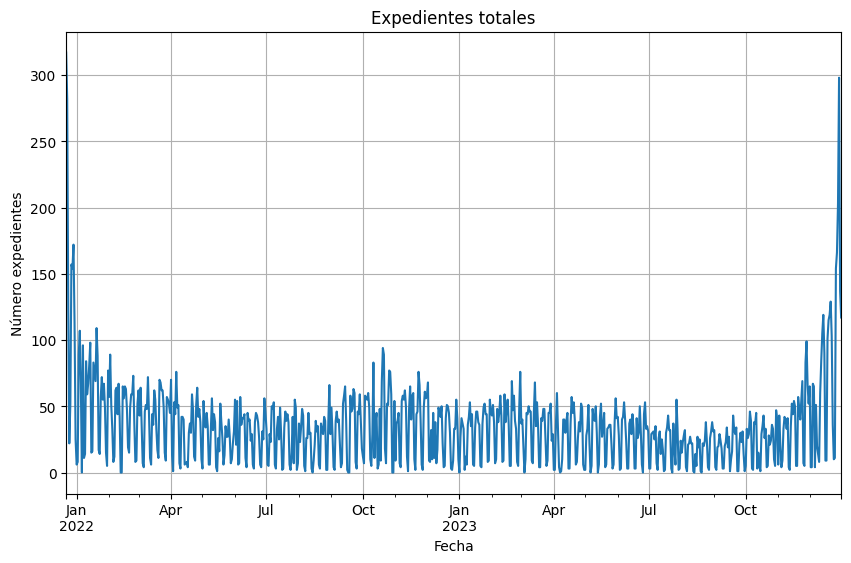

In [50]:
df_autoconsumo_ts.plot(figsize=(10, 6), title="Expedientes totales", ylabel="Número expedientes", xlabel="Fecha", legend=False)
plt.grid()
plt.show()

In [51]:
df_autoconsumo_ts_week = df_autoconsumo_simple.resample('W').size().reset_index(name='total_expedientes')
df_autoconsumo_ts_week.set_index('fecha_registro_exp', inplace=True)

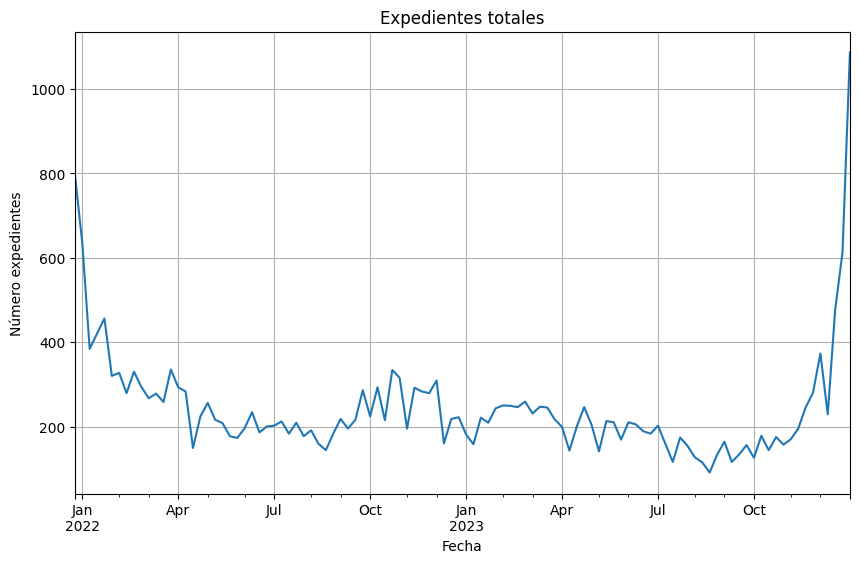

In [52]:
df_autoconsumo_ts_week.plot(figsize=(10, 6), title="Expedientes totales", ylabel="Número expedientes", xlabel="Fecha", legend=False)
plt.grid()
plt.show()

In [53]:
df_autoconsumo_ts_week.head()

,total_expedientes
fecha_registro_exp,
2021-12-26,797
2022-01-02,635
2022-01-09,384
2022-01-16,420
2022-01-23,456


In [54]:
df_autoconsumo_ts_month = df_autoconsumo_simple.resample('ME').size().reset_index(name='total_expedientes')
df_autoconsumo_ts_month.set_index('fecha_registro_exp', inplace=True)

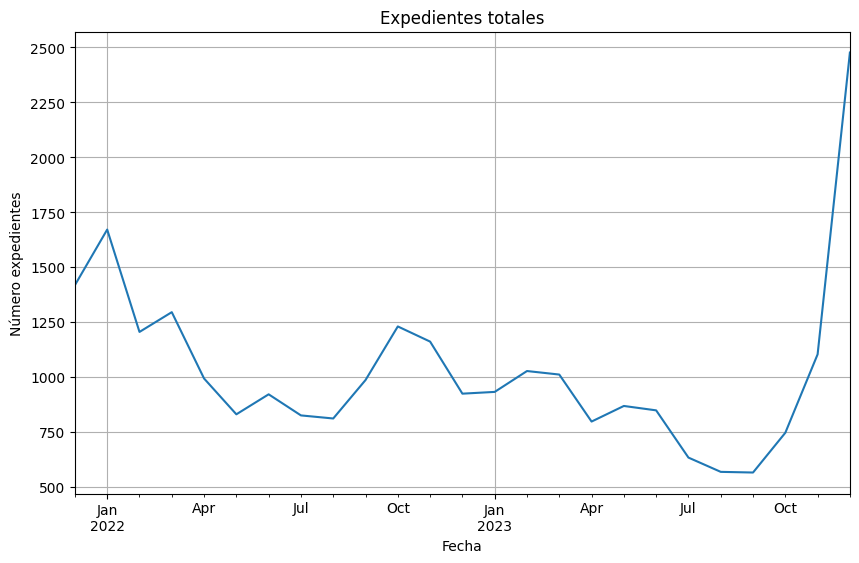

In [55]:
df_autoconsumo_ts_month.plot(figsize=(10, 6), title="Expedientes totales", ylabel="Número expedientes", xlabel="Fecha", legend=False)
plt.grid()
plt.show()

In [56]:
#moving_avg = df_autoconsumo_simple['total_count'].rolling(window=7).mean()
df_autoconsumo_simple.head()

,id_exp,dni,nif,fecha_alta_exp,municipio,provincia,es_telematica
fecha_registro_exp,,,,,,,
2021-12-23,1127895,1787973,<NA>,2022-02-09 09:07:17,Poblete,Ciudad Real,True
2022-03-24,1189980,1817983,<NA>,2022-03-25 08:12:34,Méntrida,Toledo,True
2022-03-24,1190024,1818001,<NA>,2022-03-25 08:19:59,Villanueva de Alcardete,Toledo,True
2022-03-24,1190043,1818006,<NA>,2022-03-25 08:22:58,Ciudad Real,Ciudad Real,True
2022-03-25,1190807,1818334,<NA>,2022-03-28 09:06:24,Valdeaveruelo,Guadalajara,True


In [57]:
df_autoconsumo_ts_day = df_autoconsumo_simple.resample('D').size().reset_index(name='total_expedientes')
df_autoconsumo_ts_day.set_index('fecha_registro_exp', inplace=True)

df_autoconsumo_ts_day_mov_avg = df_autoconsumo_ts_day['total_expedientes'].rolling(window=7).mean().reset_index(name='media_sem_expedientes')
df_autoconsumo_ts_day_mov_avg.set_index('fecha_registro_exp', inplace=True)

In [58]:
df_autoconsumo_ts_day_mov_avg.head(20)

,media_sem_expedientes
fecha_registro_exp,
2021-12-22,NaN
2021-12-23,NaN
2021-12-24,NaN
2021-12-25,NaN
2021-12-26,NaN
2021-12-27,NaN
2021-12-28,158.285714
2021-12-29,137.571429
2021-12-30,113.428571


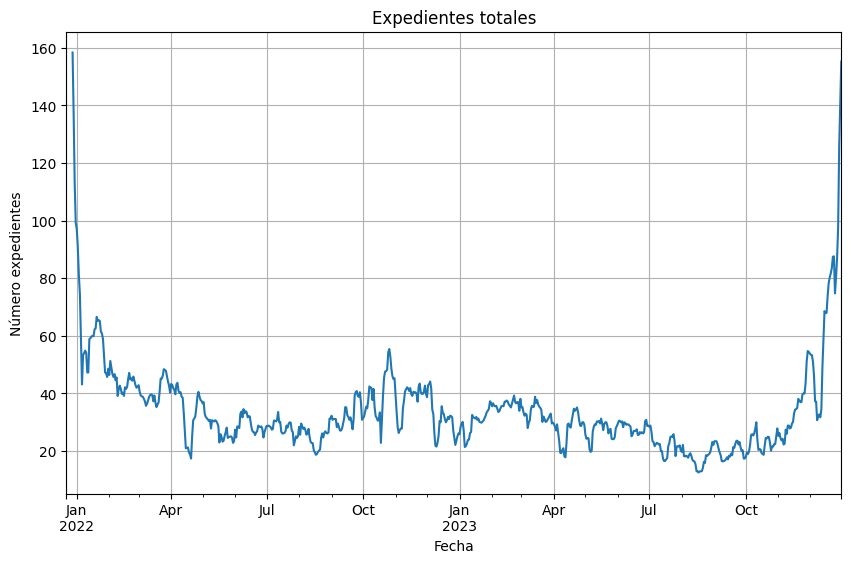

In [59]:
df_autoconsumo_ts_day_mov_avg.plot(figsize=(10, 6), title="Expedientes totales", ylabel="Número expedientes", xlabel="Fecha", legend=False)
plt.grid()
plt.show()


asfreq('d')

is useful for setting a fixed frequency but does not aggregate data
so it is not useful for this dataframe with several expedientes per day

In [62]:
df_autoconsumo_simple.head()

,id_exp,dni,nif,fecha_alta_exp,municipio,provincia,es_telematica
fecha_registro_exp,,,,,,,
2021-12-23,1127895,1787973,<NA>,2022-02-09 09:07:17,Poblete,Ciudad Real,True
2022-03-24,1189980,1817983,<NA>,2022-03-25 08:12:34,Méntrida,Toledo,True
2022-03-24,1190024,1818001,<NA>,2022-03-25 08:19:59,Villanueva de Alcardete,Toledo,True
2022-03-24,1190043,1818006,<NA>,2022-03-25 08:22:58,Ciudad Real,Ciudad Real,True
2022-03-25,1190807,1818334,<NA>,2022-03-28 09:06:24,Valdeaveruelo,Guadalajara,True


In [ ]:

Using .groupby() and .agg(): If you want more control over how to aggregate the values (e.g., sum, average, etc.), 
you can group by the date and apply an aggregation function



In [69]:
df_autoconsumo_simple.index

DatetimeIndex(['2021-12-23', '2022-03-24', '2022-03-24', '2022-03-24',
               '2022-03-25', '2022-03-25', '2022-03-25', '2022-03-25',
               '2022-03-26', '2022-03-28',
               ...
               '2023-10-31', '2023-10-31', '2023-10-31', '2023-11-01',
               '2023-11-02', '2023-11-02', '2023-11-02', '2023-11-03',
               '2023-11-03', '2023-11-03'],
              dtype='datetime64[s]', name='fecha_registro_exp', length=25845, freq=None)

In [71]:
print(df_autoconsumo_simple.index.freq)

None


In [72]:
df_autoconsumo_ts_daily  = df_autoconsumo_simple.groupby(df_autoconsumo_simple.index.date).sum()


TypeError: datetime64 type does not support sum operations